In [1]:
from torch.utils.tensorboard import SummaryWriter
import torchvision
import torch.utils.data as Data
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

/opt/anaconda3/lib/python3.8/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [2]:
LR = 1e-3
MOM = 0.5

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

train_data = torchvision.datasets.MNIST(root="./data/", train=True,
                                        transform=transform,
                                        download=False)
test_data = torchvision.datasets.MNIST(root="./data/", transform=transform,
                                       train=False, download=False)

train_loader = Data.DataLoader(dataset=train_data, batch_size=128, shuffle=True)

test_loader = Data.DataLoader(dataset=test_data, batch_size=128, shuffle=True)

In [4]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(28 * 28, 100),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.mlp(x)
        return x


mycnn = CNN()

mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x100)
Error occurs, No graph saved


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x100)

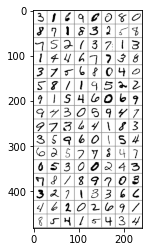

In [5]:
loss = nn.CrossEntropyLoss()
opt = optim.SGD(mycnn.parameters(), lr=LR, momentum=MOM)

dataiter = iter(train_loader)
image, label = dataiter.next()
img_grid = torchvision.utils.make_grid(image)
matplotlib_imshow(img_grid, True)

writer = SummaryWriter('runs/fashion_mnist_experiment_1')
writer.add_graph(mycnn, image)
writer.add_image('four_fashion_mnist_images', img_grid)
writer.close()
